# Obsah

> ## Úvod

> ## Knižnice

> ## Dataset

> ## Chýbajúce hodnoty

>> ### Zjednotenie formátov dát

>> ### Odvodenie chýbajúcich hodnôt po riadkoch

>> ### Doplnenie chýbajúcich hodnôt po stĺpcoch

> ## Vychýlené hodnoty

> ## Normalizácia údajov

> ## Transformácia numerických atribútov na kategorické

> ## Transformacia kategorických údajov na numerické

> ## Vytváranie atribútov kombinovanim

> ## Zdroje

## Doležité parametre
DecisionTreeClassifier(
criterion

max_depth=None

min_samples_leaf - počet pozorovani vo vyslednej podmnozine

class_weight=None

# Úvod
Na základe identifikovaných problémov v dátach a návrhu ich riešenia v predchádzajúcej fáze treba zrealizovať predspracovanie. Výsledkom by mala byť upravená dátová sada (vo formáte ​csv​) vo vhodnom tvare pre zvolený algoritmus strojového učenia (v našom prípade rozhodovacie stromy​). Zároveň, keďže predspracovaním sa mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), treba znovu zrealizovať podstatné časti prieskumnej analýzy, pričom v tejto fáze je potrebné zamerať sa aj na vzťahy medzi jednotlivými atribútmi.

# Knižnice

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

#Nastavenie rozmerov zobrazovaných grafov
plt.rcParams['figure.figsize'] = 9, 6
from IPython.display import Image

# Dataset

In [80]:
file_path = "data/zadanie4/train.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
train_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
train_data.index.name = 'id'
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 39 columns):
age                          2799 non-null float64
sex                          2800 non-null object
on thyroxine                 2800 non-null object
query on thyroxine           2800 non-null object
on antithyroid medication    2800 non-null object
sick                         2800 non-null object
pregnant                     2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
query hypothyroid            2800 non-null object
query hyperthyroid           2800 non-null object
lithium                      2800 non-null object
goitre                       2800 non-null object
tumor                        2800 non-null object
hypopituitary                2800 non-null object
psych                        2800 non-null object
TSH measured                 2800 non-null object
TSH                          2516 non-null

In [3]:
file_path = "data/zadanie4/test.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
test_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
test_data.index.name = 'id'
test_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
id,,,,,,,,,,,,,,,,,,,,,
0,68,M,f,f,f,f,f,f,f,f,...,negative.|1231,96245,HS-grad,9,Husband,0.0,0,99,1949-07-30,Sales|United-States\nMarried-civ-spouse -- Sel...
1,42,F,f,f,f,f,f,f,f,f,...,negative.|329,191177,HS-grad,9,Not-in-family,NaN,0,55,1975-10-31,Exec-managerial|United-States\nNever-married -...
2,27,F,f,f,f,f,f,f,f,f,...,negative.|2518,48585,Some-college,1000,Wife,0.0,0,4,1990-10-29 00:00:00,Prof-specialty|United-States\nMarried-civ-spou...
3,32,F,FALSE,f,f,f,f,f,f,f,...,negative.|821,251526,Some-college,10,Wife,0.0,0,20,1985-10-28,Tech-support|United-States\nMarried-civ-spouse...
4,23,F,f,f,f,f,f,f,f,f,...,negative.|951,175614,10th,6,Unmarried,0.0,0,40,??,Other-service|United-States\nNever-married -- ...


In [2]:
#Aby sme mohli pracovat 
data = train_data

NameError: name 'train_data' is not defined

# Chýbajúce hodnoty

### Zjednotenie formátov dát

### Odvodenie chýbajúcich hodnôt po riadkoch

### Doplnenie chýbajúcich hodnôt po stĺpcoch

# Vychýlené hodnoty TODO:

# Pomocné grafové examples

- data.fillna((0: 1, 1:1, 2:1))
- data.isnull().sum()
- data.dropna(how='all')
- data.plot.box()

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
    
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,-0.862825,0.150968,0
1,0.489538,-0.699464,1
2,-0.828341,-1.237656,2
3,-1.453791,-1.565641,3
4,-1.974823,-0.322370,4


In [31]:
df.head(2)#.plot.hist(); plt.axhline(0, color='g')


,A,B,C,D
2000-01-01,-0.160775,-2.114656,-1.019234,-0.076241
2000-01-02,0.845314,-1.040389,-2.591398,0.409359


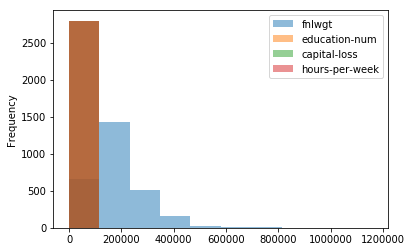

In [47]:
data.select_dtypes('int').plot.hist(alpha=0.5)

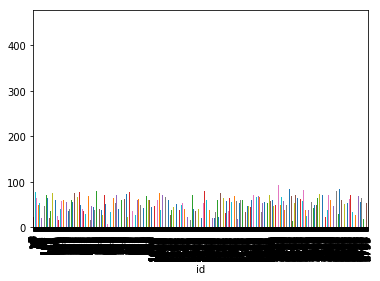

In [48]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

#df2.plot.bar(stacked=True);
plt.figure()
data['age'].plot.bar()


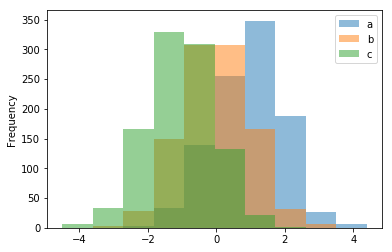

In [50]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();

df4.plot.hist(alpha=0.5)

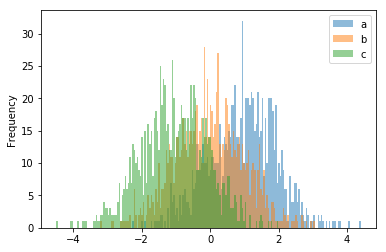

In [55]:
df4.plot.hist(alpha=0.5, bins=200)

In [73]:
plt.figure()
df['A'].head()

2000-01-01   -0.160775
2000-01-02    0.845314
2000-01-03    1.346938
2000-01-04    1.188452
2000-01-05    1.552615
Freq: D, Name: A, dtype: float64

In [76]:
df['A'].diff().head()

2000-01-01         NaN
2000-01-02    1.006089
2000-01-03    0.501624
2000-01-04   -0.158487
2000-01-05    0.364163
Freq: D, Name: A, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3ec24160>,
      dtype=object)

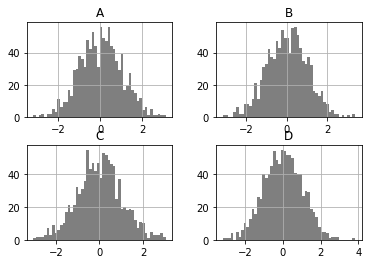

In [81]:
df.diff().hist(color='k', alpha=0.5, bins=50)

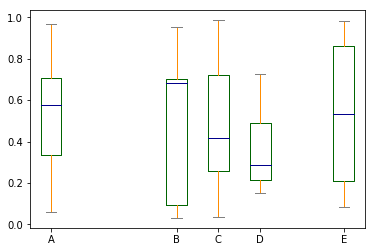

In [91]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+', positions=[1, 4, 5, 6, 8])

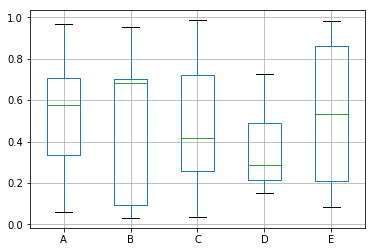

In [93]:
df.boxplot()

In [96]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure();
df
#bp = df.boxplot(by='X')

,Col1,Col2,X
0,0.965633,0.624767,A
1,0.978090,0.890527,A
2,0.889513,0.240762,A
3,0.962247,0.807822,A
4,0.954490,0.480691,A
5,0.581837,0.472990,B
6,0.467900,0.643239,B
7,0.466312,0.380420,B
8,0.028527,0.276696,B
9,0.178692,0.429271,B


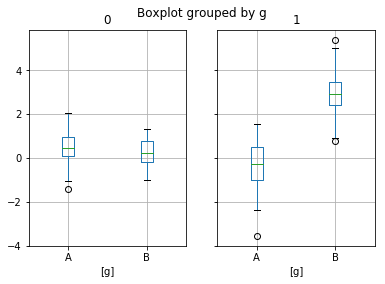

In [109]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

In [111]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

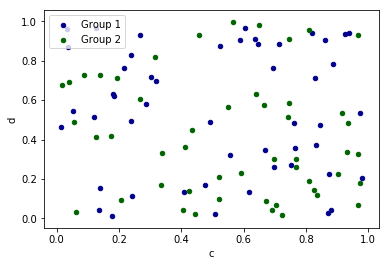

In [118]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

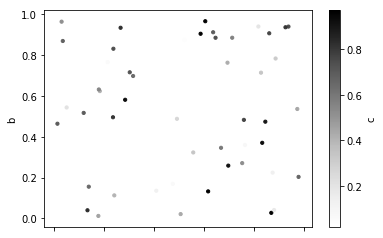

In [124]:
df.plot.scatter(x='a', y='b', c='c', s=10);

# Zdroje
Príklady ako pracovať s pandas - https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting

Robenie grafov v pandas - https://pandas.pydata.org/pandas-docs/stable/visualization.html